+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Episode 4999/5000.

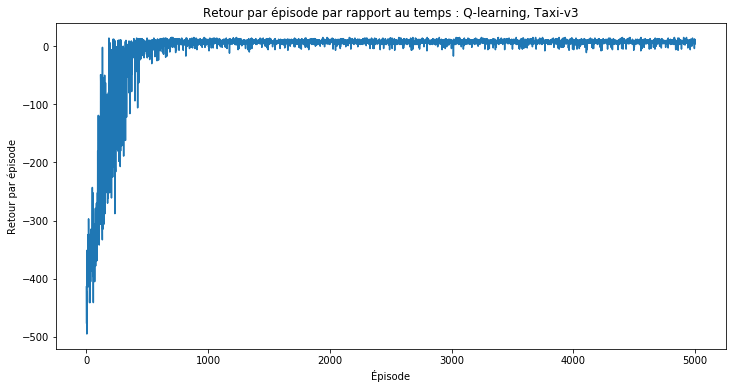

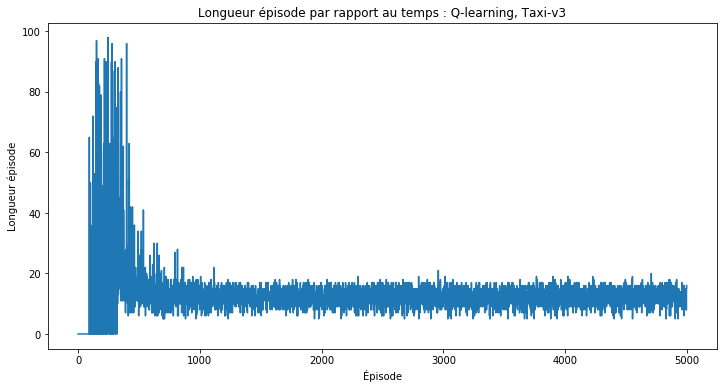

In [9]:
%matplotlib inline
# -*- coding: utf-8 -*-
"""
Optimisation de politique avec méthode Q-learning
Politique epsilon-vorace
Environnement Taxi-v3 
Version avec décroissance de epsilon
"""
import gym
import numpy as np
import random
import itertools
import sys
import matplotlib
from matplotlib import pyplot as plt

def afficher_longueur_episode(longueur_episode):
    """
    Afficher l'évolution des longueurs d'épisodes avec le temps
    """
    figure1 = plt.figure(figsize=(12,6))
    plt.plot(longueur_episode)
    plt.xlabel("Épisode")
    plt.ylabel("Longueur épisode")
    plt.title("Longueur épisode par rapport au temps : Q-learning, Taxi-v3")
    
def afficher_retour_par_episode(retour_par_episode):
    """
    Afficher l'évolution des récompenses par épisode
    """
    figure1 = plt.figure(figsize=(12,6))
    plt.plot(retour_par_episode)
    plt.xlabel("Épisode")
    plt.ylabel("Retour par épisode")
    plt.title("Retour par épisode par rapport au temps : Q-learning, Taxi-v3")

def politique_optimale_Q(env, nombre_episodes, max_t=99, gamma=1.0, alpha= 1.0, epsilon=1, max_epsilon = 1.0, 
                min_epsilon = 0.01, taux_decroissance = 0.005):
    """
    Optimisation de politique avec méthode Q-learning
        env: environnement de type OpenAI gym
        nombre_episodes: nombre d'épisodes générés pour l'apprentissage
        gamma: facteur d'escompte des récompenses futures
        alpha: taux d'apprentissage
        epsilon: probabilité pour politique e-vorace
    Retour:
        Q: np.array(nb_etats,nb_actions)
        retour_par_episode: tableau des retours par épisode
        longueur_episode: tableau des longueurs d'épisode
    """
    longueur_episode = np.zeros(nombre_episodes)
    retour_par_episode = np.zeros(nombre_episodes)
    nb_actions = env.action_space.n
    nb_etats = env.observation_space.n
    Q = np.zeros((nb_etats, nb_actions))
    
    for i_episode in range(nombre_episodes):
        if (i_episode+1) % 10 == 0:
            print("\rEpisode {}/{}.".format(i_episode, nombre_episodes), end="")
            sys.stdout.flush()

         # Un episode est un tableau de tuples (etat, action, recompense)
        etat = env.reset()
        for t in range(max_t):
            
            # Choisir action selon politique e-vorace
            unif_01 = random.uniform(0, 1)
            if unif_01 > epsilon:
                action = np.argmax(Q[etat,:])
            else:
                action = env.action_space.sample()
            
            etat_suivant, recompense, final, _ = env.step(action)
            Q[etat,action] = Q[etat,action]+alpha*(recompense+gamma*np.max(Q[etat_suivant,:])-Q[etat,action])
            retour_par_episode[i_episode]+=recompense
            if final:
                longueur_episode[i_episode] = t
                break
            etat = etat_suivant
        # Réduire epsilon
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-taux_decroissance*i_episode) 
        
    return Q,retour_par_episode,longueur_episode

env = gym.make("Taxi-v3")
env.render()

Q,retour_par_episode,longueur_episode = politique_optimale_Q(env, nombre_episodes=5000,gamma=0.95, alpha=0.8)
afficher_retour_par_episode(retour_par_episode)
afficher_longueur_episode(longueur_episode)

In [10]:
""" Test du jeu après optimisation de Q """
nb_episodes = 3
max_etapes = 99 
env.reset()
recompenses = []

for episode in range(nb_episodes):
    etat = env.reset()
    final = False
    total_recompenses = 0
    print("**********************************")
    print("Épisode : ", episode)

    for etape in range(max_etapes):
        env.render()
        action = np.argmax(Q[etat])
        
        etat_suivant, recompense, final, _ = env.step(action)
        
        total_recompenses += recompense
        
        if final:
            recompenses.append(total_recompenses)
            print ("Total des récompenses de l'épisode :", total_recompenses)
            print("Longueur épisode :", etape)
            env.render()
            break
        etat = etat_suivant
env.close()
print ("Moyenne de récompenses par épisode: " +  str(sum(recompenses)/nb_episodes))

**********************************
Épisode :  0
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|